IMPORT LIBRARIES

In [ ]:
import pandas as pd
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy, scipy.stats

Mount the original drive

In [ ]:
#Mount the original drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Call and read dataset

In [ ]:
# Call and read dataset
path_gm = '/content/drive/MyDrive/Diplomado/proyecto/Proyecto Severity COVID-19/paper_1/data_severity_pathol_prob_gm.csv'
path_om = '/content/drive/MyDrive/Diplomado/proyecto/Proyecto Severity COVID-19/paper_1/data_severity_pathol_prob_om.csv'

df_data_gm = pd.read_csv(path_gm)
df_data_om = pd.read_csv(path_om)

Show the fitures for geographic data

In [ ]:
# Show the fitures for geographic data
df_data_gm

,filename,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Lung Lesion,Fracture,Lung Opacity,Enlarged Cardiomediastinum,geographic_mean,DenseNet121,InceptionV3,resnet50,vgg16,Xception,label
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,-1.995463,-2.250835,-2.319615,-3.428214,-8.006400,-6.877346,-4.031230,-1.672731,-5.218715,-3.404117,-4.661779,-2.777763,-0.158225,-5.696409,-6.134421,-3.529992,-0.864325,-2.181635,2.3,0.851559,0.871329,0.913002,0.069072,0.998013,1
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,-2.284326,-4.367359,-2.385848,-5.089296,-10.857897,-7.155473,-2.594435,-3.705988,-6.537526,-3.225794,-4.704632,-3.100978,-0.781046,-2.579316,-12.197935,-3.383951,-1.379524,-4.105000,4.0,0.960704,0.150587,0.847197,0.958360,0.970292,1
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,-2.176806,-3.614070,-2.414206,-3.824801,-8.485291,-6.886006,-3.519685,-2.881644,-7.652413,-3.460787,-3.667775,-1.921321,-0.330128,-3.950301,-6.181408,-2.754359,-0.753431,-3.419982,4.7,0.641163,0.786716,0.410167,0.990818,0.999502,1
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,-2.716297,-3.918124,-1.960546,-3.291000,-9.475438,-7.721296,-5.336512,-3.587376,-9.994222,-4.568360,-3.194962,-2.231982,-0.787121,-5.019547,-5.820308,-2.532609,-0.032212,-3.053708,5.7,0.782235,0.851945,0.393671,0.996665,0.360342,1
4,nejmc2001573_f1a.jpeg,-2.065649,-2.314026,-1.301638,-4.320744,-2.661332,-7.755165,-4.507202,-1.229500,-1.323991,-4.131345,-0.686836,-3.710819,-3.513136,-7.139474,-7.976898,-4.147092,0.660750,-1.587787,2.0,0.999453,0.985737,0.998424,0.999216,0.999166,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-2.247870,-2.695761,-0.932922,-5.468601,-1.497197,-5.348270,-2.066755,-3.267211,-1.935185,-3.216589,-1.510092,-2.148279,-2.634754,-7.641832,-2.866753,-3.669294,-0.451698,-2.525874,4.7,0.999360,0.999991,0.992401,0.998774,1.000000,1
78,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-1.204691,-2.154405,-0.693697,-4.653790,-0.989784,-6.958145,-3.083191,-1.447739,-2.728833,-4.454429,-0.893002,-2.856616,-2.519794,-4.358291,-3.592949,-3.895416,0.281588,-2.383605,4.0,0.999625,0.999537,0.987859,0.999095,1.000000,1
79,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-1.337873,-1.917539,-0.742821,-4.561998,-2.193726,-5.323779,-4.394251,-1.312465,-2.222228,-4.245948,-1.477661,-2.255113,-1.368516,-6.786782,-2.221639,-3.056663,0.387156,-1.724825,4.7,0.999914,0.993296,0.933430,0.999972,1.000000,1
80,covid-19-pneumonia-evolution-over-a-week-1-day...,-2.920534,-3.951263,-1.233765,-5.946329,-6.810845,-5.927144,-3.987623,-4.672496,-1.747967,-4.772371,-4.642920,-2.352367,-3.957139,-5.675848,-9.433144,-4.329388,-1.704252,-5.290677,0.7,0.928157,0.999905,0.821510,0.998875,0.999839,1


Show the fitures for opacity data

In [ ]:
# Show the fitures for opacity data
df_data_om

,filename,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Lung Lesion,Fracture,Lung Opacity,Enlarged Cardiomediastinum,opacity_mean,DenseNet121,InceptionV3,resnet50,vgg16,Xception,label
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,-1.995463,-2.250835,-2.319615,-3.428214,-8.006400,-6.877346,-4.031230,-1.672731,-5.218715,-3.404117,-4.661779,-2.777763,-0.158225,-5.696409,-6.134421,-3.529992,-0.864325,-2.181635,1.3,0.851559,0.871329,0.913002,0.069072,0.998013,1
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,-2.284326,-4.367359,-2.385848,-5.089296,-10.857897,-7.155473,-2.594435,-3.705988,-6.537526,-3.225794,-4.704632,-3.100978,-0.781046,-2.579316,-12.197935,-3.383951,-1.379524,-4.105000,3.0,0.960704,0.150587,0.847197,0.958360,0.970292,1
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,-2.176806,-3.614070,-2.414206,-3.824801,-8.485291,-6.886006,-3.519685,-2.881644,-7.652413,-3.460787,-3.667775,-1.921321,-0.330128,-3.950301,-6.181408,-2.754359,-0.753431,-3.419982,3.0,0.641163,0.786716,0.410167,0.990818,0.999502,1
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,-2.716297,-3.918124,-1.960546,-3.291000,-9.475438,-7.721296,-5.336512,-3.587376,-9.994222,-4.568360,-3.194962,-2.231982,-0.787121,-5.019547,-5.820308,-2.532609,-0.032212,-3.053708,3.7,0.782235,0.851945,0.393671,0.996665,0.360342,1
4,nejmc2001573_f1a.jpeg,-2.065649,-2.314026,-1.301638,-4.320744,-2.661332,-7.755165,-4.507202,-1.229500,-1.323991,-4.131345,-0.686836,-3.710819,-3.513136,-7.139474,-7.976898,-4.147092,0.660750,-1.587787,2.0,0.999453,0.985737,0.998424,0.999216,0.999166,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-2.247870,-2.695761,-0.932922,-5.468601,-1.497197,-5.348270,-2.066755,-3.267211,-1.935185,-3.216589,-1.510092,-2.148279,-2.634754,-7.641832,-2.866753,-3.669294,-0.451698,-2.525874,2.7,0.999360,0.999991,0.992401,0.998774,1.000000,1
78,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-1.204691,-2.154405,-0.693697,-4.653790,-0.989784,-6.958145,-3.083191,-1.447739,-2.728833,-4.454429,-0.893002,-2.856616,-2.519794,-4.358291,-3.592949,-3.895416,0.281588,-2.383605,3.3,0.999625,0.999537,0.987859,0.999095,1.000000,1
79,1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf...,-1.337873,-1.917539,-0.742821,-4.561998,-2.193726,-5.323779,-4.394251,-1.312465,-2.222228,-4.245948,-1.477661,-2.255113,-1.368516,-6.786782,-2.221639,-3.056663,0.387156,-1.724825,4.0,0.999914,0.993296,0.933430,0.999972,1.000000,1
80,covid-19-pneumonia-evolution-over-a-week-1-day...,-2.920534,-3.951263,-1.233765,-5.946329,-6.810845,-5.927144,-3.987623,-4.672496,-1.747967,-4.772371,-4.642920,-2.352367,-3.957139,-5.675848,-9.433144,-4.329388,-1.704252,-5.290677,0.7,0.928157,0.999905,0.821510,0.998875,0.999839,1


### Analysis for 18 pathologies + 5 probabilites (Geographic Mean)

In [ ]:
# Join 18 clinical features and 5 probabilities of the geagraphic mean 
names_pathol = list(df_data_gm.columns[1:19])
names_prob = list(df_data_gm.columns[20:25])
name_gm = [df_data_gm.columns[19]]
names_pathol_prob = names_pathol + names_prob + name_gm
df_all_gm = df_data_gm[names_pathol_prob]
df_all_gm

,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Lung Lesion,Fracture,Lung Opacity,Enlarged Cardiomediastinum,DenseNet121,InceptionV3,resnet50,vgg16,Xception,geographic_mean
0,-1.995463,-2.250835,-2.319615,-3.428214,-8.006400,-6.877346,-4.031230,-1.672731,-5.218715,-3.404117,-4.661779,-2.777763,-0.158225,-5.696409,-6.134421,-3.529992,-0.864325,-2.181635,0.851559,0.871329,0.913002,0.069072,0.998013,2.3
1,-2.284326,-4.367359,-2.385848,-5.089296,-10.857897,-7.155473,-2.594435,-3.705988,-6.537526,-3.225794,-4.704632,-3.100978,-0.781046,-2.579316,-12.197935,-3.383951,-1.379524,-4.105000,0.960704,0.150587,0.847197,0.958360,0.970292,4.0
2,-2.176806,-3.614070,-2.414206,-3.824801,-8.485291,-6.886006,-3.519685,-2.881644,-7.652413,-3.460787,-3.667775,-1.921321,-0.330128,-3.950301,-6.181408,-2.754359,-0.753431,-3.419982,0.641163,0.786716,0.410167,0.990818,0.999502,4.7
3,-2.716297,-3.918124,-1.960546,-3.291000,-9.475438,-7.721296,-5.336512,-3.587376,-9.994222,-4.568360,-3.194962,-2.231982,-0.787121,-5.019547,-5.820308,-2.532609,-0.032212,-3.053708,0.782235,0.851945,0.393671,0.996665,0.360342,5.7
4,-2.065649,-2.314026,-1.301638,-4.320744,-2.661332,-7.755165,-4.507202,-1.229500,-1.323991,-4.131345,-0.686836,-3.710819,-3.513136,-7.139474,-7.976898,-4.147092,0.660750,-1.587787,0.999453,0.985737,0.998424,0.999216,0.999166,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-2.247870,-2.695761,-0.932922,-5.468601,-1.497197,-5.348270,-2.066755,-3.267211,-1.935185,-3.216589,-1.510092,-2.148279,-2.634754,-7.641832,-2.866753,-3.669294,-0.451698,-2.525874,0.999360,0.999991,0.992401,0.998774,1.000000,4.7
78,-1.204691,-2.154405,-0.693697,-4.653790,-0.989784,-6.958145,-3.083191,-1.447739,-2.728833,-4.454429,-0.893002,-2.856616,-2.519794,-4.358291,-3.592949,-3.895416,0.281588,-2.383605,0.999625,0.999537,0.987859,0.999095,1.000000,4.0
79,-1.337873,-1.917539,-0.742821,-4.561998,-2.193726,-5.323779,-4.394251,-1.312465,-2.222228,-4.245948,-1.477661,-2.255113,-1.368516,-6.786782,-2.221639,-3.056663,0.387156,-1.724825,0.999914,0.993296,0.933430,0.999972,1.000000,4.7
80,-2.920534,-3.951263,-1.233765,-5.946329,-6.810845,-5.927144,-3.987623,-4.672496,-1.747967,-4.772371,-4.642920,-2.352367,-3.957139,-5.675848,-9.433144,-4.329388,-1.704252,-5.290677,0.928157,0.999905,0.821510,0.998875,0.999839,0.7


Remove from the dataframe above the geographic mean column and show the shape of that


In [ ]:
# remove from the dataframe above the geographic mean column and show the shape of that
X = df_all_gm.drop('geographic_mean', axis=1)
y = df_all_gm.geographic_mean.copy()
print(X.shape, y.shape)

(82, 23) (82,)


Split of the data for testing and training data


In [ ]:
# Split of the data for testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(61, 23) (61,) (21, 23) (21,)


The data is normalized 


In [ ]:
# The data is normalized 
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Defining the model with 200 epochs

In [ ]:
# Defining the model with 200 epochs

model_nn = Sequential()
model_nn.add(Dense(10, input_dim=23, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

model_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model_nn.summary()

history = model_nn.fit(X_train_scaled, y_train, validation_split=0.1, epochs=200)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                240       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 0s 126ms/step - loss: 29.4024 - mae: 4.8143 - val_loss: 18.6000 - val_mae: 3.8260
Epoch 2/200
2/2 [==============================] - 0s 25ms/step - loss: 28.9868 - mae: 4.7783 - val_loss: 18.3779 - val_mae: 3.8033
Epoch 3/200
2/2 [==============================] - 0s 30ms/step - loss: 28.5927 - mae: 4.7429 - val_loss: 18.1577 - val_mae: 3.7803
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 28.2086 - mae: 4.7082 - val_loss: 17.9408 - val_m

Plot the training and validation accuracy and loss at each epoch

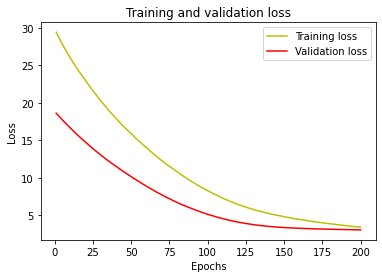

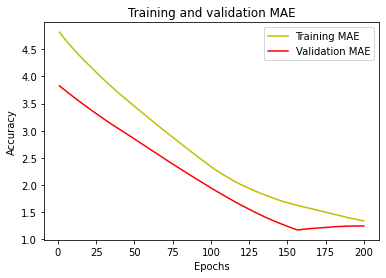

In [ ]:
## Plot the training and validation accuracy and loss at each epoch
# 

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

First model: NEURAL NETWORK

In [ ]:
##############################################################
### First model: NEURAL NETWORK

mse_nn, mae_nn = model_nn.evaluate(X_test_scaled, y_test)
print()
print('Mean squared error using Neural Network: ', mse_nn)
print('Mean absolute error using Neural Network: ', mae_nn)

1/1 [==============================] - 0s 14ms/step - loss: 4.0931 - mae: 1.5634

Mean squared error using Neural Network:  4.093053340911865
Mean absolute error using Neural Network:  1.5633513927459717


Second model:  LINEAR REGRESSION

In [ ]:
##############################################################
### Second model:  LINEAR REGRESSION

model_lr = linear_model.LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  4.286871230441294
Mean absolute error from linear regression:  1.5947578423469921


Third model: DECISION TREE

In [ ]:
############################################################
## Third model: DECISION TREE

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  4.84
Mean absolute error using decision tree:  1.6285714285714288


Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model 


In [ ]:
# Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model 

feature_list = list(X.columns)
feature_imp = pd.Series(model_dt.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.720494
Fracture                      0.064092
Mass                          0.056659
Atelectasis                   0.040746
InceptionV3                   0.029098
Effusion                      0.016958
Emphysema                     0.015307
Lung Lesion                   0.013700
Infiltration                  0.011559
Fibrosis                      0.009970
vgg16                         0.008813
Enlarged Cardiomediastinum    0.006275
Consolidation                 0.002315
Edema                         0.001655
Cardiomegaly                  0.001196
Pleural_Thickening            0.000326
Pneumonia                     0.000326
Hernia                        0.000241
DenseNet121                   0.000136
Xception                      0.000136
Pneumothorax                  0.000000
resnet50                      0.000000
Nodule                        0.000000
dtype: float64


Fourth model: RANDOM FOREST


In [ ]:
##############################################
## Fourth model: RANDOM FOREST

model_rf = RandomForestRegressor(n_estimators = 30, random_state=30)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Mean squared error using Random Forest: ', mse_rf)
print('Mean absolute error Using Random Forest: ', mae_rf)

Mean squared error using Random Forest:  2.6825698412698418
Mean absolute error Using Random Forest:  1.2433333333333334


Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model


In [ ]:
# Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model
feature_list = list(X.columns)
feature_imp = pd.Series(model_rf.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.664223
Pneumothorax                  0.030353
Cardiomegaly                  0.029118
Mass                          0.027211
Emphysema                     0.025127
Pneumonia                     0.024913
InceptionV3                   0.023365
Effusion                      0.022936
Infiltration                  0.022894
Pleural_Thickening            0.020634
Nodule                        0.016049
resnet50                      0.013393
vgg16                         0.012653
Atelectasis                   0.009400
Hernia                        0.009165
Lung Lesion                   0.008485
Enlarged Cardiomediastinum    0.008429
Consolidation                 0.007849
DenseNet121                   0.006698
Edema                         0.005754
Xception                      0.005125
Fibrosis                      0.004644
Fracture                      0.001583
dtype: float64


Fifth model: XGBOOST

In [ ]:
###################################
## Fifth model: XGBOOST

model_xgbr = XGBRegressor(verbosity=0)
model_xgbr.fit(X_train_scaled, y_train)
y_pred_xgbr = model_xgbr.predict(X_test_scaled)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
mae_xgbr = mean_absolute_error(y_test, y_pred_xgbr)
print('Mean squared error using XGBoost: ', mse_xgbr)
print('Mean absolute error Using XGBoost: ', mae_xgbr)

Mean squared error using XGBoost:  3.1438348566771737
Mean absolute error Using XGBoost:  1.357035315604437


Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model


In [ ]:
# Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model

feature_list = list(X.columns)
feature_imp = pd.Series(model_xgbr.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.578712
Cardiomegaly                  0.057476
Mass                          0.042301
Pneumothorax                  0.041201
Pneumonia                     0.035228
Xception                      0.035216
resnet50                      0.031969
Fracture                      0.030229
Consolidation                 0.024654
Nodule                        0.021467
Pleural_Thickening            0.014804
Enlarged Cardiomediastinum    0.014543
InceptionV3                   0.013590
Atelectasis                   0.012134
Lung Lesion                   0.008164
Effusion                      0.008087
Emphysema                     0.007139
vgg16                         0.006835
Infiltration                  0.004919
Hernia                        0.004396
DenseNet121                   0.003922
Fibrosis                      0.001785
Edema                         0.001229
dtype: float32


Show comparison between mse and r2 of the 5 implemented models

In [ ]:
# Show comparison between mse and r2 of the 5 implemented models
nombre_modelos = ['Neural Nets', 'Multiple Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
MSE = [mse_nn, mse_lr, mse_dt, mse_rf, mse_xgbr]
MAE = [mae_nn, mae_lr, mae_dt, mae_rf, mae_xgbr]
dict_metrics_gm = {'Modelos':nombre_modelos, 'Mean Squared Error':MSE, 'Mean Absolute Error': MAE}
df_metrics_gm = pd.DataFrame(dict_metrics_gm)
df_metrics_gm

,Modelos,Mean Squared Error,Mean Absolute Error
0,Neural Nets,4.093053,1.563351
1,Multiple Linear Regression,4.286871,1.594758
2,Decision Tree,4.840000,1.628571
3,Random Forest,2.682570,1.243333
4,XGBoost,3.143835,1.357035


Linear Regression Model for "Lung Opacity vs Geographic Mean"

In [ ]:
# Show Linear Regression Model for "Lung Opacity vs Geographic Mean"
df_vs_gm = df_all_gm[['Lung Opacity','geographic_mean']]
df_vs_gm

,Lung Opacity,geographic_mean
0,-0.864325,2.3
1,-1.379524,4.0
2,-0.753431,4.7
3,-0.032212,5.7
4,0.660750,2.0
...,...,...
77,-0.451698,4.7
78,0.281588,4.0
79,0.387156,4.7
80,-1.704252,0.7


Create dependent (Lung Opacity) and independent variable (geographic_mean) and show their respective shape

In [ ]:
# Create dependent (Lung Opacity) and independent variable (geographic_mean) and show their respective shape
X = df_vs_gm.loc[:, ['Lung Opacity']].copy()
y = df_vs_gm['geographic_mean']

print(X.shape, y.shape)

(82, 1) (82,)


Plot Geographic mean vs Lung opacity

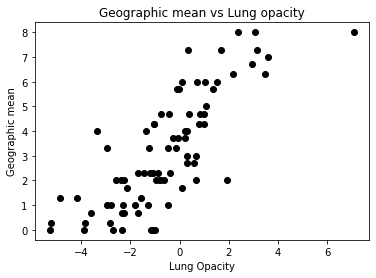

In [ ]:
# Plot Geographic mean vs Lung opacity
plt.scatter(X, y, color='black')
plt.title('Geographic mean vs Lung opacity')
plt.xlabel('Lung Opacity')
plt.ylabel('Geographic mean')
plt.show()

Split of the data for testing and training data

In [ ]:
# Split of the data for testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32, 1) (50, 1) (32,) (50,)


The data is normalized 

In [ ]:
# The data is normalized 
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Liner model

In [ ]:
# Liner model

model_linear = linear_model.LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
correlation_linear = scipy.stats.pearsonr(y_pred_linear, y_test)[0]
print('Mean squared error from linear regression: ', mse_linear)
print('Mean absolute error from linear regression: ', mae_linear)
print('R2:', r2_linear)
print('Correlation:', correlation_linear)

Mean squared error from linear regression:  1.9948817087688442
Mean absolute error from linear regression:  1.159416359416606
R2: 0.6593030123893233
Correlation: 0.8168088138114264


Show the equation

In [ ]:
print('Coefficient of Linear Regression:', model_linear.coef_[0])
print('Interception:', model_linear.intercept_)
print()
print('Equation: y = {}*x + {}'.format(str(model_linear.coef_[0]), str(model_linear.intercept_)))

Coefficient of Linear Regression: 1.4102245947286929
Interception: 2.871875

Equation: y = 1.4102245947286929*x + 2.871875


PLot Lung Opacity vs Geographic

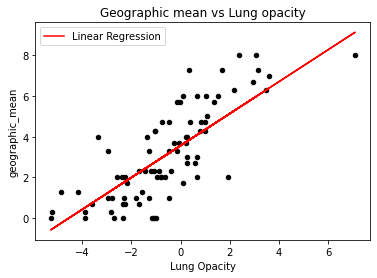

In [ ]:
# PLot Lung Opacity vs Geographic
ax = df_vs_gm.plot.scatter(x='Lung Opacity', y='geographic_mean', color='black')
ax.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
ax.set_title('Geographic mean vs Lung opacity')
ax.legend()

Show comparison between mse and mae of the 5 implemented models

In [ ]:
# Show comparison between mse and r2 of the 5 implemented models
new_row = {'Modelos':'Linear Regresion (Lung Opacity)', 'Mean Squared Error':mse_linear, 'Mean Absolute Error':mae_linear}
df_metrics_gm = df_metrics_gm.append(new_row, ignore_index=True)
df_metrics_gm

,Modelos,Mean Squared Error,Mean Absolute Error
0,Neural Nets,4.093053,1.563351
1,Multiple Linear Regression,4.286871,1.594758
2,Decision Tree,4.840000,1.628571
3,Random Forest,2.682570,1.243333
4,XGBoost,3.143835,1.357035
5,Linear Regresion (Lung Opacity),1.994882,1.159416
6,Linear Regresion (Lung Opacity),1.994882,1.159416


### Analysis for 18 pathologies + 5 probabilites (Opacity Mean)

In [ ]:
#Join 18 clinical features and 5 probabilities of the opacity mean  
names_pathol = list(df_data_om.columns[1:19])
names_prob = list(df_data_om.columns[20:25])
name_om = [df_data_om.columns[19]]
names_pathol_prob = names_pathol + names_prob + name_om
df_all_om = df_data_om[names_pathol_prob]
df_all_om

,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Lung Lesion,Fracture,Lung Opacity,Enlarged Cardiomediastinum,DenseNet121,InceptionV3,resnet50,vgg16,Xception,opacity_mean
0,-1.995463,-2.250835,-2.319615,-3.428214,-8.006400,-6.877346,-4.031230,-1.672731,-5.218715,-3.404117,-4.661779,-2.777763,-0.158225,-5.696409,-6.134421,-3.529992,-0.864325,-2.181635,0.851559,0.871329,0.913002,0.069072,0.998013,1.3
1,-2.284326,-4.367359,-2.385848,-5.089296,-10.857897,-7.155473,-2.594435,-3.705988,-6.537526,-3.225794,-4.704632,-3.100978,-0.781046,-2.579316,-12.197935,-3.383951,-1.379524,-4.105000,0.960704,0.150587,0.847197,0.958360,0.970292,3.0
2,-2.176806,-3.614070,-2.414206,-3.824801,-8.485291,-6.886006,-3.519685,-2.881644,-7.652413,-3.460787,-3.667775,-1.921321,-0.330128,-3.950301,-6.181408,-2.754359,-0.753431,-3.419982,0.641163,0.786716,0.410167,0.990818,0.999502,3.0
3,-2.716297,-3.918124,-1.960546,-3.291000,-9.475438,-7.721296,-5.336512,-3.587376,-9.994222,-4.568360,-3.194962,-2.231982,-0.787121,-5.019547,-5.820308,-2.532609,-0.032212,-3.053708,0.782235,0.851945,0.393671,0.996665,0.360342,3.7
4,-2.065649,-2.314026,-1.301638,-4.320744,-2.661332,-7.755165,-4.507202,-1.229500,-1.323991,-4.131345,-0.686836,-3.710819,-3.513136,-7.139474,-7.976898,-4.147092,0.660750,-1.587787,0.999453,0.985737,0.998424,0.999216,0.999166,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,-2.247870,-2.695761,-0.932922,-5.468601,-1.497197,-5.348270,-2.066755,-3.267211,-1.935185,-3.216589,-1.510092,-2.148279,-2.634754,-7.641832,-2.866753,-3.669294,-0.451698,-2.525874,0.999360,0.999991,0.992401,0.998774,1.000000,2.7
78,-1.204691,-2.154405,-0.693697,-4.653790,-0.989784,-6.958145,-3.083191,-1.447739,-2.728833,-4.454429,-0.893002,-2.856616,-2.519794,-4.358291,-3.592949,-3.895416,0.281588,-2.383605,0.999625,0.999537,0.987859,0.999095,1.000000,3.3
79,-1.337873,-1.917539,-0.742821,-4.561998,-2.193726,-5.323779,-4.394251,-1.312465,-2.222228,-4.245948,-1.477661,-2.255113,-1.368516,-6.786782,-2.221639,-3.056663,0.387156,-1.724825,0.999914,0.993296,0.933430,0.999972,1.000000,4.0
80,-2.920534,-3.951263,-1.233765,-5.946329,-6.810845,-5.927144,-3.987623,-4.672496,-1.747967,-4.772371,-4.642920,-2.352367,-3.957139,-5.675848,-9.433144,-4.329388,-1.704252,-5.290677,0.928157,0.999905,0.821510,0.998875,0.999839,0.7


Remove from the dataframe above the geographic mean column and show the shape of that


In [ ]:
# remove from the dataframe above the geographic mean column and show the shape of that

X = df_all_om.drop('opacity_mean', axis=1)
y = df_all_om.opacity_mean.copy()
print(X.shape, y.shape)

(82, 23) (82,)


Split of the data for testing and training data

In [ ]:
# Split of the data for testing and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(61, 23) (61,) (21, 23) (21,)


The data is normalized

In [ ]:
# The data is normalized
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Defining the model with 200 epochs

In [ ]:
# Defining the model with 200 epochs

model_nn = Sequential()
model_nn.add(Dense(10, input_dim=23, activation='relu'))
model_nn.add(Dense(1, activation='linear'))

model_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model_nn.summary()

history = model_nn.fit(X_train_scaled, y_train, validation_split=0.1, epochs=200)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                240       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 0s 117ms/step - loss: 12.5274 - mae: 2.9455 - val_loss: 8.8384 - val_mae: 2.4434
Epoch 2/200
2/2 [==============================] - 0s 20ms/step - loss: 12.3049 - mae: 2.9198 - val_loss: 8.6824 - val_mae: 2.4245
Epoch 3/200
2/2 [==============================] - 0s 20ms/step - loss: 12.0800 - mae: 2.8953 - val_loss: 8.5368 - val_mae: 2.4064
Epoch 4/200
2/2 [==============================] - 0s 23ms/step - loss: 11.8652 - mae: 2.8727 - val_loss: 8.3913 - val_mae: 

Plot the training and validation accuracy and loss at each epoch

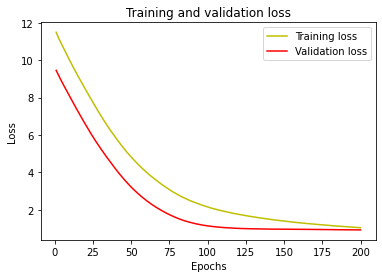

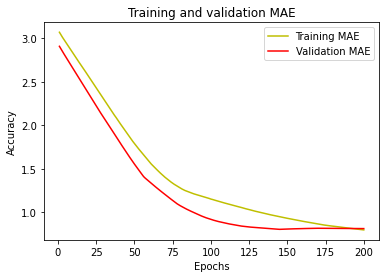

In [ ]:
## Plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

First model: NEURAL NETWORK

In [ ]:
##############################################################
### First model: NEURAL NETWORK

mse_nn, mae_nn = model_nn.evaluate(X_test_scaled, y_test)
print()
print('Mean squared error using Neural Network: ', mse_nn)
print('Mean absolute error using Neural Network: ', mae_nn)

1/1 [==============================] - 0s 16ms/step - loss: 1.9803 - mae: 1.1689

Mean squared error using Neural Network:  1.9803129434585571
Mean absolute error using Neural Network:  1.168929100036621


Second model:  LINEAR REGRESSION

In [ ]:
##############################################################
### Second model:  LINEAR REGRESSION

model_lr = linear_model.LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  1.9340285238215018
Mean absolute error from linear regression:  1.0698048683236248


Third model: DECISION TREE

In [ ]:
############################################################
## Third model: DECISION TREE

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  2.21952380952381
Mean absolute error using decision tree:  1.1285714285714286


Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model 


In [ ]:
# Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model 

feature_list = list(X.columns)
feature_imp = pd.Series(model_dt.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.506328
Pleural_Thickening            0.126540
Cardiomegaly                  0.121053
Pneumonia                     0.085223
Xception                      0.028586
resnet50                      0.026520
InceptionV3                   0.015941
Edema                         0.015303
Fracture                      0.012678
vgg16                         0.012178
Consolidation                 0.010088
Enlarged Cardiomediastinum    0.010088
Pneumothorax                  0.008200
Infiltration                  0.007491
Effusion                      0.004981
Atelectasis                   0.003590
Fibrosis                      0.003138
Emphysema                     0.001401
Lung Lesion                   0.000336
Mass                          0.000336
Hernia                        0.000000
DenseNet121                   0.000000
Nodule                        0.000000
dtype: float64


Fourth model: RANDOM FOREST

In [ ]:
##############################################
## Fourth model: RANDOM FOREST

model_rf = RandomForestRegressor(n_estimators = 30, random_state=30)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Mean squared error using Random Forest: ', mse_rf)
print('Mean absolute error Using Random Forest: ', mae_rf)

Mean squared error using Random Forest:  1.0026328042328043
Mean absolute error Using Random Forest:  0.8266666666666664


Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model


In [ ]:
# Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model

feature_list = list(X.columns)
feature_imp = pd.Series(model_rf.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.453862
Effusion                      0.145907
resnet50                      0.057997
DenseNet121                   0.045345
Mass                          0.040194
Consolidation                 0.039924
Pneumonia                     0.024429
Cardiomegaly                  0.019914
Atelectasis                   0.019758
InceptionV3                   0.018453
Hernia                        0.018090
Nodule                        0.017094
Lung Lesion                   0.013869
Fracture                      0.013774
Emphysema                     0.012250
Enlarged Cardiomediastinum    0.011973
Infiltration                  0.010894
Pneumothorax                  0.010230
vgg16                         0.008857
Edema                         0.005007
Fibrosis                      0.004942
Pleural_Thickening            0.004344
Xception                      0.002894
dtype: float64


Fifth model: XGBOOST

In [ ]:
###################################
## Fifth model: XGBOOST

model_xgbr = XGBRegressor(verbosity=0)
model_xgbr.fit(X_train_scaled, y_train)
y_pred_xgbr = model_xgbr.predict(X_test_scaled)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
mae_xgbr = mean_absolute_error(y_test, y_pred_xgbr)
print('Mean squared error using XGBoost: ', mse_xgbr)
print('Mean absolute error Using XGBoost: ', mae_xgbr)

Mean squared error using XGBoost:  1.3232910370650888
Mean absolute error Using XGBoost:  0.9508911462057205


Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model


In [ ]:
# Sort the features according to the dregree of relevance to geographic_mean and found the the most important feature is LUNG OPACITY according this model

feature_list = list(X.columns)
feature_imp = pd.Series(model_xgbr.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

Lung Opacity                  0.417783
Effusion                      0.186403
DenseNet121                   0.075985
Cardiomegaly                  0.054723
resnet50                      0.034627
InceptionV3                   0.031098
Pleural_Thickening            0.030459
Mass                          0.020483
Hernia                        0.019300
Atelectasis                   0.015635
Pneumothorax                  0.013701
Consolidation                 0.012556
Emphysema                     0.012477
Lung Lesion                   0.012332
vgg16                         0.010843
Nodule                        0.009996
Pneumonia                     0.008283
Fibrosis                      0.007680
Enlarged Cardiomediastinum    0.006986
Edema                         0.006790
Xception                      0.005451
Fracture                      0.003331
Infiltration                  0.003075
dtype: float32


Show comparison between mse and r2 of the 5 implemented models

In [ ]:
# Show comparison between mse and r2 of the 5 implemented models

nombre_modelos = ['Neural Nets', 'Multiple Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
MSE = [mse_nn, mse_lr, mse_dt, mse_rf, mse_xgbr]
MAE = [mae_nn, mae_lr, mae_dt, mae_rf, mae_xgbr]
dict_metrics_om = {'Modelos':nombre_modelos, 'Mean Squared Error':MSE, 'Mean Absolute Error': MAE}
df_metrics_om = pd.DataFrame(dict_metrics_om)
df_metrics_om

,Modelos,Mean Squared Error,Mean Absolute Error
0,Neural Nets,1.980313,1.168929
1,Multiple Linear Regression,1.934029,1.069805
2,Decision Tree,2.219524,1.128571
3,Random Forest,1.002633,0.826667
4,XGBoost,1.323291,0.950891


Linear Regression Model for "Lung Opacity vs Opacity Mean"

In [ ]:
# Show Linear Regression Model for "Lung Opacity vs Geographic Mean"

df_vs_om = df_all_om[['Lung Opacity','opacity_mean']]
df_vs_om

,Lung Opacity,opacity_mean
0,-0.864325,1.3
1,-1.379524,3.0
2,-0.753431,3.0
3,-0.032212,3.7
4,0.660750,2.0
...,...,...
77,-0.451698,2.7
78,0.281588,3.3
79,0.387156,4.0
80,-1.704252,0.7


Create dependent (Lung Opacity) and independent variable (geographic_mean) and show their respective shape


In [ ]:
# Create dependent (Lung Opacity) and independent variable (geographic_mean) and show their respective shape

X = df_vs_om.loc[:, ['Lung Opacity']].copy()
y = df_vs_om['opacity_mean']

print(X.shape, y.shape)

(82, 1) (82,)


Plot Geographic mean vs Lung opacity

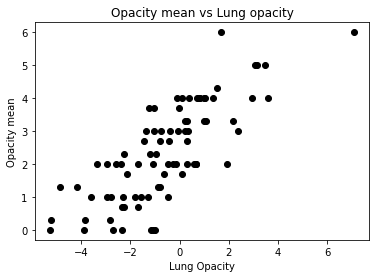

In [ ]:
# Plot Geographic mean vs Lung opacity

plt.scatter(X, y, color='black')
plt.title('Opacity mean vs Lung opacity')
plt.xlabel('Lung Opacity')
plt.ylabel('Opacity mean')
plt.show()

Split of the data for testing and training data

In [ ]:
# Split of the data for testing and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32, 1) (50, 1) (32,) (50,)


The data is normalized 

In [ ]:
# The data is normalized 

scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Liner model

In [ ]:
# Liner model

model_linear = linear_model.LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
correlation_linear = scipy.stats.pearsonr(y_pred_linear, y_test)[0]
print('Mean squared error from linear regression: ', mse_linear)
print('Mean absolute error from linear regression: ', mae_linear)
print('R2:', r2_linear)
print('Correlation:', correlation_linear)

Mean squared error from linear regression:  0.9648230861804288
Mean absolute error from linear regression:  0.813363501824025
R2: 0.6094775972354732
Correlation: 0.7845058611349233


In [ ]:
print('Coefficient of Linear Regression:', model_linear.coef_[0])
print('Interception:', model_linear.intercept_)
print()
print('Equation: y = {}*x + {}'.format(str(model_linear.coef_[0]), str(model_linear.intercept_)))

Coefficient of Linear Regression: 0.9323800409560014
Interception: 2.15

Equation: y = 0.9323800409560014*x + 2.15


PLot Lung Opacity vs Geographic

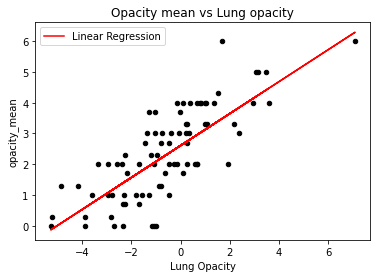

In [ ]:
# PLot Lung Opacity vs Geographic

ax = df_vs_om.plot.scatter(x='Lung Opacity', y='opacity_mean', color='black')
ax.plot(X_test, y_pred_linear, color='red', label='Linear Regression')
ax.set_title('Opacity mean vs Lung opacity')
ax.legend()

Show comparison between mse and r2 of the 5 implemented models

In [ ]:
# Show comparison between mse and r2 of the 5 implemented models

new_row = {'Modelos':'Linear Regresion (Lung Opacity)', 'Mean Squared Error':mse_linear, 'Mean Absolute Error':mae_linear}
df_metrics_om = df_metrics_om.append(new_row, ignore_index=True)
df_metrics_om

,Modelos,Mean Squared Error,Mean Absolute Error
0,Neural Nets,1.980313,1.168929
1,Multiple Linear Regression,1.934029,1.069805
2,Decision Tree,2.219524,1.128571
3,Random Forest,1.002633,0.826667
4,XGBoost,1.323291,0.950891
5,Linear Regresion (Lung Opacity),0.964823,0.813364
